<a href="https://colab.research.google.com/github/royal-dit/tensorflow-deeplearning/blob/main/image_colorization_part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

In [ ]:
!wget https://raw.githubusercontent.com/royal-dit/tensorflow-deeplearning/main/helper_func.py 

In [ ]:
from helper_func import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dirg


In [ ]:
# from bing_image_downloader import downloader
# downloader.download("person",limit = 1000 ,output_dir = "dataset",
#                     adult_filter_off = True,force_replace = False,timeout = 600)
                    
                     

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from skimage.color import rgb2lab,lab2rgb
from skimage.io import imread,imshow
import shutil
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU




In [ ]:
Train_root_dir = '/content/10_food_classes_all_data/train'
DEST = "/content/train/images"

# if not os.path.exists(DEST):
#   os.makedirs(DEST)
#   for dir in os.listdir(Train_root_dir):
#     for img in os.listdir(os.path.join(Train_root_dir,dir)):
#       ORG = os.path.join(Train_root_dir,img)
#       try:
#         imread(ORG)
#         shutil.copy(ORG,DEST)
#       except:
#         print(f"the image at {ORG} cant be read")
  
# import os
import shutil

source = '/content/10_food_classes_all_data/train/chicken_curry'
destination =  "/content/trains/images"

# gather all files
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
	src_path = os.path.join(source, f)
	dst_path = os.path.join(destination, f)
	shutil.move(src_path, dst_path)







In [ ]:
len(os.listdir("/content/drive/MyDrive/Colab Notebooks/random images/downloads"))


66

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   featurewise_center=True,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   #featurewise_std_normalization = True
                                   )

In [ ]:
train = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/random images/downloads',
                                          target_size = (256,256),
                                          
                                          shuffle = True,
                                          

                                          ) 

Found 41048 images belonging to 66 classes.


**visualizing the image**

In [ ]:
#to visualize the image 
t_img , label = train.next()

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
def plotimage(img_arr,label):
  plt.figure(figsize = (5,5))
  for im , l in zip(img_arr,label):
    plt.imshow(im)
    plt.show()
    plt.axis('off')


In [ ]:
# plotimage(t_img[:5],label[:5])
t_img.shape,label.shape

((32, 256, 256, 3), (32, 66))

**chnaging rgb to lab**

In [ ]:
X=[]
Y=[]
for img in t_img:
  try:
    lab = rgb2lab(img)
    X.append(lab[:,:,0])
    Y.append(lab[:,:,1:]/128)
  except:
    print("error")


In [ ]:
X_train = np.array(X)
X_train = np.expand_dims(X_train,axis=len(X_train.shape))
y_train = np.array(Y)


In [ ]:
X_train.shape,y_train.shape

((32, 256, 256, 1), (32, 256, 256, 2))

**building a model**

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=2,input_shape=(256,256,1)),
#     tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
#     tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same',strides=2),
#     tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
#     tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same',strides=2),
#     tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'),
#     tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'),
#     tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
# #decoder
#     tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
#     tf.keras.layers.UpSampling2D((2,2)),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
#     tf.keras.layers.UpSampling2D((2,2)),
#     # tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
#     # tf.keras.layers.UpSampling2D((2,2)),
#     # tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'),
#     # tf.keras.layers.UpSampling2D((2,2)),
#     tf.keras.layers.Conv2D(2,(3,3),activation=LeakyReLU(alpha=0.01),padding='same'),
#     tf.keras.layers.UpSampling2D((2,2))
# ])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='tanh',padding='same',strides=2,input_shape=(256,256,1)),
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same',strides=2),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same',strides=2),
    tf.keras.layers.Conv2D(512,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(512,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='tanh',padding='same'),
#decoder
    tf.keras.layers.Conv2D(128,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(16,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.Conv2D(2,(3,3),activation='tanh',padding='same'),
    tf.keras.layers.UpSampling2D((2,2))
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['acc']
)
history = model.fit(X_train,y_train,epochs = 100)

**saving and loading our model

Text(0, 0.5, 'epochs')

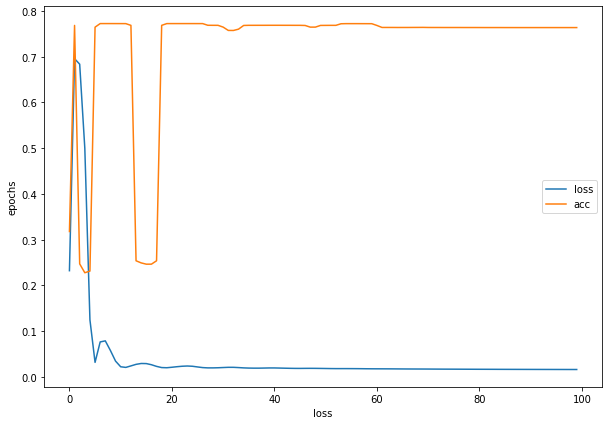

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.xlabel("loss")
plt.ylabel("epochs")

In [ ]:
model.save('./bestmodel.h5') 

In [ ]:
from keras.utils.image_utils import img_to_array

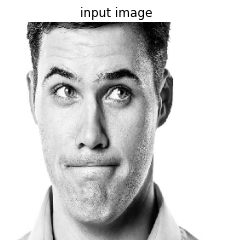

In [ ]:
img1_color = []
path = '/content/human face grayscale.jpg'
img = img_to_array(
    tf.keras.preprocessing.image.load_img(path,target_size = (256,256,3))
)/255
plt.title("input image")
plt.imshow(img)
plt.axis('off')

plt.show()

In [ ]:
img1_color.append(img)
img1_color = rgb2lab(img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))



In [ ]:
output1 = model.predict(img1_color)
output1 = output1*128


1/1 [==============================] - 0s 16ms/step


In [ ]:
result = np.zeros((256,256,3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]

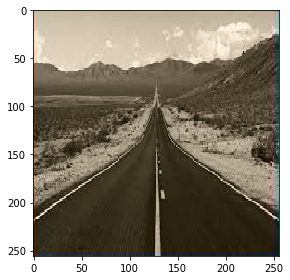

In [ ]:
imshow(lab2rgb(result))